  <h3 style="color: teal; background-color: white; padding: 10px; border-radius: 5px; text-align:center">
  2: Data Understanding & Exploratory Data Analysis (EDA)
</h3>

<h4 style="
  margin-bottom: 4px;
  background-color: #f3f4f6;
  padding: 4px 8px;
  border-radius: 4px;
  display: inline-block;
  color: black;
">
  2.1 Data Loading and Structure
</h4>

In [3]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots




In [4]:
# Define colors: 'no' as red, 'yes' as green
custom_colors = {"no": "#FF9999", "yes": "#77DD77"}

In [5]:
# Load the dataset
df = pd.read_csv("../data/bank-additional/bank-additional-full.csv", sep=';')

# Display basic information
print('Shape of the dataset:', df.shape)

Shape of the dataset: (41188, 21)


In [6]:
# Display column names
print('Column names:', df.columns.tolist())

Column names: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [7]:
# Display first few rows
print('First few rows of the dataset:')
print(df.head())

First few rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.c

In [8]:
# Display data types of each column
print('Data types of each column:')
print(df.dtypes)

Data types of each column:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [9]:
# Check for missing values
print('Missing values in each column:')
print(df.isnull().sum())

Missing values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [10]:
# Check for 'unknown' values in categorical columns

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Count 'unknown' values in each categorical column
unknown_counts = {}
for col in categorical_cols:
    unknown_counts[col] = (df[col] == 'unknown').sum()

# Display the counts
unknown_counts_df = pd.DataFrame.from_dict(unknown_counts, orient='index', columns=['Unknown_Count'])
unknown_counts_df['Unknown_Proportion'] = unknown_counts_df['Unknown_Count'] / len(df)
unknown_counts_df = unknown_counts_df.sort_values(
    by='Unknown_Proportion', ascending=False
)

print('Counts and proportions of "unknown" values in categorical columns:')
print(unknown_counts_df)

Counts and proportions of "unknown" values in categorical columns:
             Unknown_Count  Unknown_Proportion
default               8597            0.208726
education             1731            0.042027
housing                990            0.024036
loan                   990            0.024036
job                    330            0.008012
marital                 80            0.001942
contact                  0            0.000000
month                    0            0.000000
day_of_week              0            0.000000
poutcome                 0            0.000000
y                        0            0.000000


The Bank Marketing dataset was loaded into a pandas DataFrame using a semicolon (;) delimiter. The dataset contains 41,188 observations and 21 variables, including the binary target variable y.

Each row represents a single contact between the bank and a client during a marketing campaign. The dataset includes a mix of:
- Numerical features
- Categorical features
- Macroeconomic indicators

A structural inspection confirms that:
- No standard missing values (NaN) are present
- Several categorical variables contain the value "unknown"

Unlike missing values, "unknown" represents unavailable or undisclosed information rather than technical data loss. These values require explicit handling during preprocessing, as treating them as regular categories may affect model interpretability and predictive behavior.

<h4 style="
  margin-bottom: 4px;
  background-color: #f3f4f6;
  padding: 4px 8px;
  border-radius: 4px;
  display: inline-block;
  color: black;
">
  2.2 Missing Values and “Unknown” Categories
</h4>

<b>Key Findings</b>
- No null values detected using .isnull()
- High proportions of "unknown" appear in:
  - job
  - education
  - default
  - poutcome

Interpretation
 - "unknown" is informative, not random
- It may reflect:
  - Client refusal to disclose information
  - Lack of historical data
- Removing these rows would significantly reduce dataset size and may introduce bias

Decision
- "unknown" values will be retained as a separate category during encoding
- This allows models to learn whether missing information itself is predictive

<h4 style="
  margin-bottom: 4px;
  background-color: #f3f4f6;
  padding: 4px 8px;
  border-radius: 4px;
  display: inline-block;
  color: black;
">
  2.3 Target Variable Distribution
</h4>

In [11]:
# Calculate counts and proportions of target variable 'y'
target_counts = df['y'].value_counts()
target_proportions = df['y'].value_counts(normalize=True)

# Combine into a single DataFrame
target_summary = pd.DataFrame({
    'Count': target_counts,
    'Proportion': target_proportions
})


print('Target variable "y" summary:')
print(target_summary)


Target variable "y" summary:
     Count  Proportion
y                     
no   36548    0.887346
yes   4640    0.112654


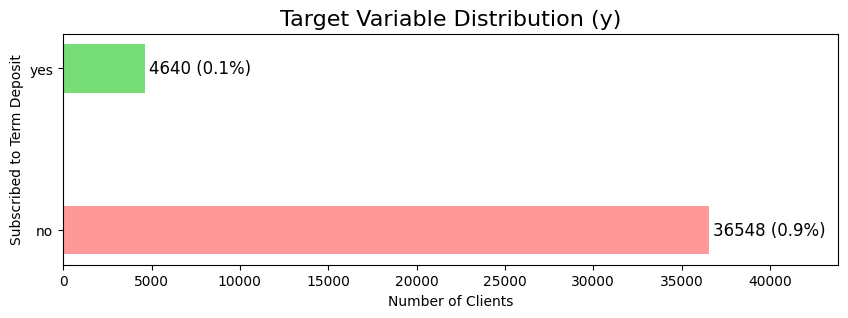

In [12]:

# Plot horizontal bar chart
plt.figure(figsize=(10,3))
bars = plt.barh(
    target_counts.index, 
    target_counts.values, 
    color=[custom_colors[i] for i in target_counts.index],
    height=0.3
)

# Add count and percentage labels on bars
for bar, count, prop in zip(bars, target_counts.values, target_proportions.values):
    plt.text(
        count + 200, bar.get_y() + bar.get_height()/2, 
        f"{count} ({prop:.1f}%)", 
        va='center', fontsize=12
    )

plt.title("Target Variable Distribution (y)", fontsize=16)
plt.xlabel("Number of Clients")
plt.ylabel("Subscribed to Term Deposit")
plt.xlim(0, target_counts.max()*1.2)  # add space for labels

plt.show()


The target variable y indicates whether a client subscribed to a term deposit.

The class distribution is highly imbalanced:
- The majority of clients did not subscribe
- Only a small fraction subscribed to the product

<b>Implications</b>
- Accuracy alone is misleading
- Models biased toward predicting "no" may still achieve high accuracy
- Evaluation must emphasize:
  - Recall
  - Precision
  - F1-score
  - ROC-AUC
- Class imbalance handling (e.g., class weighting) will be considered during modeling

<h4 style="
  margin-bottom: 4px;
  background-color: #f3f4f6;
  padding: 4px 8px;
  border-radius: 4px;
  display: inline-block;
  color: black;
">
  2.4 Feature Type Overview
</h4>

In [13]:
# Numerical features
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous']

# Categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Economic indicator features
economic_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed']

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Economic Features:", economic_features)

Numerical Features: ['age', 'duration', 'campaign', 'pdays', 'previous']
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Economic Features: ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


| Feature Group | Description                   | Examples                |
| ------------- | ----------------------------- | ----------------------- |
| Numerical     | Continuous or count-based     | age, campaign, pdays    |
| Categorical   | Client & campaign descriptors | job, education, contact |
| Economic      | Macroeconomic context         | euribor3m, emp.var.rate |


In [ ]:
# Summarize 'unknown' values in categorical features
unknown_summary = pd.DataFrame({
    "Feature": categorical_features,
    "Unknown_Count": [(df[col] == "unknown").sum() for col in categorical_features],
    "Unknown_Percentage": [
        round((df[col] == "unknown").mean() * 100, 2)
        for col in categorical_features
    ]
})

unknown_summary.sort_values("Unknown_Count", ascending=False)

,Feature,Unknown_Count,Unknown_Percentage
3,default,8597,20.87
2,education,1731,4.20
4,housing,990,2.40
5,loan,990,2.40
0,job,330,0.80
1,marital,80,0.19
6,contact,0,0.00
7,month,0,0.00
8,day_of_week,0,0.00
9,poutcome,0,0.00


In [25]:
fig = px.bar(
    unknown_summary,
    x="Unknown_Percentage",
    y="Feature",
    orientation="h",
    text=unknown_summary["Unknown_Percentage"].round(2),
    title="Percentage of 'Unknown' Values in Categorical Features",
    color="Unknown_Percentage",
    color_continuous_scale="blues",
    template="plotly_white"
)

fig.update_layout(
    xaxis_title="Percentage of 'Unknown' Values (%)",
    yaxis_title="Feature"
)

fig.update_traces(
    texttemplate="%{text}%",
    textposition="outside"
)

fig.show()


<h4 style="
  margin-bottom: 4px;
  background-color: #f3f4f6;
  padding: 4px 8px;
  border-radius: 4px;
  display: inline-block;
  color: black;
">
  2.5 Numerical Features
</h4>

In [15]:

# List of numerical features including economic indicators
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Summary statistics
numerical_summary = df[numerical_features].describe().T
numerical_summary['IQR'] = numerical_summary['75%'] - numerical_summary['25%']
numerical_summary['Skew'] = df[numerical_features].skew()
numerical_summary['Kurtosis'] = df[numerical_features].kurtosis()

print("Numerical Features Summary:")
print(numerical_summary)


Numerical Features Summary:
                  count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max      IQR      Skew   Kurtosis  
age               38.000    47.000    98.000   15.000  0.784697   0.791312  
duration         180.000 

<b>Key Observations</b>

Age
- Slight right skew
- Majority of clients are middle-aged

Campaign-related variables (campaign, previous)
- Strong right skew
- Most clients contacted few times
- A small number of extreme cases

pdays
- Dominated by value 999
- Indicates clients not previously contacted
- This value carries semantic meaning and should not be treated as a regular number

Economic indicators
- Low variance
- Stable distributions
- Potential multicollinearity (to be assessed later)

Implications for Preprocessing
- Skewed variables may benefit from:
  - Log transformation
  - Robust scaling

pdays may require:
- Binary flag (previously contacted vs not)
- Or careful numerical handling

In [26]:
count_999 = (df["pdays"] == 999).sum()
count_other = (df["pdays"] != 999).sum()

import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Bar(
            x=["Never Contacted (999)", "Previously Contacted"],
            y=[count_999, count_other],
            text=[count_999, count_other],
            textposition="auto"
        )
    ]
)

fig.update_layout(
    title="Distribution of pdays Values",
    xaxis_title="Client Contact Status",
    yaxis_title="Number of Clients",
    template="plotly_white"
)

fig.show()


<h4 style="
  margin-bottom: 4px;
  background-color: #f3f4f6;
  padding: 4px 8px;
  border-radius: 4px;
  display: inline-block;
  color: black;
">
  2.6 Univariate Analysis
</h4>

In [16]:
# Visualize distributions and outliers for selected numerical features
selected_numerical = ['age', 'campaign', 'pdays', 'previous']

fig = make_subplots(
    rows=len(selected_numerical),
    cols=2,
    subplot_titles=[
        f"Distribution of {selected_numerical[i//2]}" if i % 2 == 0 else f"Boxplot of {selected_numerical[i//2]}"
        for i, f in enumerate(selected_numerical * 2)
    ]
)

for i, feature in enumerate(selected_numerical, start=1):
    # Histogram
    fig.add_trace(
        go.Histogram(
            x=df[feature],
            nbinsx=30,
            name=feature,
            showlegend=False
        ),
        row=i,
        col=1
    )

    # Boxplot
    fig.add_trace(
        go.Box(
            x=df[feature],
            name=feature,
            showlegend=False
        ),
        row=i,
        col=2
    )

fig.update_layout(
    height=300 * len(selected_numerical),
    title_text="Numerical Feature Distributions and Outliers",
    template="plotly_white"
)

fig.show()


In [17]:

selected_categorical = ['job', 'education', 'contact', 'poutcome']

for feature in selected_categorical:
    prop_df = (
        df.groupby(feature)['y']
        .value_counts(normalize=True)
        .rename('proportion')
        .reset_index()
    )

    fig = px.scatter(
        prop_df,
        x='proportion',
        y=feature,
        color='y',
        symbol='y',
        category_orders={'y': ['yes', 'no']},
        color_discrete_map=custom_colors,
        title=f"Subscription Proportion by {feature}",
        size_max=12
    )

    fig.update_traces(marker=dict(size=12, opacity=0.85))

    fig.update_layout(
        xaxis_title="Proportion",
        yaxis_title=feature.capitalize(),
        template="plotly_white",
        legend_title_text="Subscribed",
        height=400
    )

    fig.show()


In [18]:
selected_numerical = ['age', 'campaign', 'pdays', 'duration']

for feature in selected_numerical:
    fig = px.violin(
        df,
        x='y',
        y=feature,
        color='y',
        box=True,
        title=f'{feature} Distribution by Subscription',
        color_discrete_map=custom_colors 
    )
    fig.show()
    


In [19]:
macro_features = [
    'emp.var.rate', 'cons.price.idx',
    'cons.conf.idx', 'euribor3m', 'nr.employed'
]

corr_matrix = df[macro_features].corr()

fig = px.imshow(
    corr_matrix,
    text_auto=".2f",
    color_continuous_scale="RdBu_r",
    title="Correlation Between Macroeconomic Indicators"
)

fig.update_layout(
    template="plotly_white",
    width=800,
    height=600
)

fig.show()


<h5>Key Insights</h5>



<b><u>Target Imbalance</u></b>

The target variable y is highly imbalanced, with approximately 11.3% of clients subscribing to a term deposit and 88.7% not subscribing.
This imbalance implies that accuracy alone is insufficient for evaluating model performance. As a result, precision, recall, F1-score, and ROC-AUC are emphasized in the evaluation stage, and class weighting strategies are later explored to improve minority class detection.

<b><u>Numerical Feature Distributions</u></b>

Several numerical features exhibit strong skewness and outliers:
- Campaign and previous are heavily right-skewed, indicating that most clients were contacted only a few times, while a small number experienced repeated contacts.
- Pdays is dominated by the value 999, representing clients who were never contacted before, effectively acting as a binary indicator rather than a continuous variable.
- Age shows a moderate right skew, with most clients clustered between 30 and 50 years old.

These characteristics suggest that scaling is necessary, and that tree-based models may handle these distributions more naturally than linear models. For linear models, standardization is applied to avoid dominance by features with larger ranges.

<b><u>Call Duration and Target Leakage</u></b>

The variable duration shows a very strong association with the target variable: longer calls are significantly more likely to result in a subscription.
However, since call duration is only known after the call has ended, including it in a real world predictive system would lead to target leakage.

Therefore, duration is retained only for exploratory analysis and benchmarking purposes, and excluded from all final predictive models to ensure realistic deployment assumptions.

<b><u>Categorical Features and Subscription Patterns</u></b>

Several categorical features demonstrate clear differences in subscription behavior:
- Contact type: Clients contacted via cellular show a higher subscription rate than those contacted by telephone.
- Poutcome: A previous campaign outcome of success is strongly associated with future subscription.
- Job and education reveal meaningful variation, with retirees and clients with higher education levels more likely to subscribe.
- Month shows seasonal effects, suggesting temporal patterns in campaign effectiveness.

To properly capture these relationships, categorical variables are later encoded using one-hot encoding, allowing models to learn category-specific effects without imposing artificial order.

<b><u>Macroeconomic Indicators</u></b>

Macroeconomic variables such as euribor3m, nr.employed, and emp.var.rate are relatively stable over time but exhibit strong correlations with each other.
These features represent broader economic conditions that influence customer behavior at a population level rather than an individual level.

Because they are numerical and continuous, they are scaled alongside other numerical variables and included in the models to provide contextual information without separate transformation.

In [20]:
# Save the DataFrame to disk for other notebooks

import os

os.makedirs("../outputs", exist_ok=True)

# Save the DataFrame
df.to_pickle("../outputs/bank_df.pkl")
print("DataFrame saved to outputs/bank_df.pkl")

DataFrame saved to outputs/bank_df.pkl
